]

In [20]:
import scipy
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/sjvasconcello/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./data/bicicletas-compartidas.csv")
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [3]:
ycat = df["cuartil-ano"]
ycat = ycat.apply(lambda x: "Cat-" + str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [4]:
valores, conteo_freq = np.unique(ycat, return_counts=True)
(valores, conteo_freq)

(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330]))

In [5]:
tabla_frecuencia = dict(zip(valores, conteo_freq))
tabla_frecuencia

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [6]:
# Variable numerica
ynum = df["viento"].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [7]:
np.percentile(ynum, q=100)

56.5

In [8]:
np.percentile(ynum, q=0)

0.0

In [9]:
# Mediana
np.percentile(ynum, q=50)

15.0

In [10]:
valores = [0,25,50,75,100]
np.percentile(ynum, q=valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [11]:
valores = [0,20,40,60, 80,100]
np.percentile(ynum, q=valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [12]:
list(range(0,110,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [14]:
valores = list(range(0,110,10))
np.percentile(ynum, q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [16]:
y = df["bicis-compartidas"]
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [17]:
# Valor atipico
Q1 = np.percentile(ynum, q=25)
Q3 = np.percentile(ynum, q=75)
RI = Q3 - Q1

lim_inf = Q1-1.5* RI
lim_sup = Q3+1.5* RI

[lim_inf, lim_sup]

[-5.75, 36.25]

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

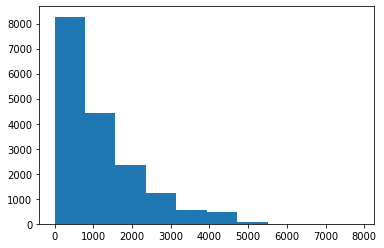

In [19]:
plt.hist(y)

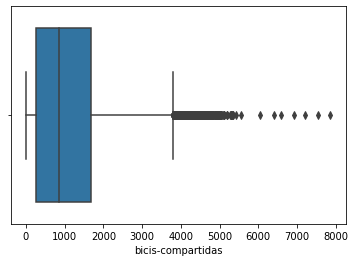

In [22]:
sns.boxplot(y)